In [2]:
import os
import glob
import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import matplotlib.patches as patches
from matplotlib.offsetbox import AnchoredText
from sklearn.cluster import DBSCAN

import sys
sys.path.append('/home/yaolinm/Projects/Florence/funcs/')
from dbf import *
from extraction import *

In [3]:
finished=np.sort(glob.glob('/scratch/zspica_root/zspica0/yaolinm/Florence/dbf/master/*'))
xcorr_folder='/scratch/zspica_root/zspica0/yaolinm/Florence/stacked_xcorr2/pws/'
pairs=np.load('/home/yaolinm/Projects/Florence/complete_workflow/bash_files/valid_pairs.npy')
ref=h5py.File('/scratch/zspica_root/zspica0/yaolinm/Florence/cc_pairs.h5','r')

finished=np.sort(glob.glob('/scratch/zspica_root/zspica0/yaolinm/Florence/dbf/master/*'))
source_beams=[]
receiver_beams=[]
array_ch='1500'
for beam in finished:
    
    if 'source_'+str(array_ch).zfill(4) in beam:
        source=int(array_ch)
        receiver=int(os.path.basename(beam).split('_')[3])
        
        if 300<=abs(receiver-source)<=800:
            source_beams.append(beam)
            
    if 'receiver_'+str(array_ch).zfill(4) in beam:
        receiver=int(array_ch)
        source=int(os.path.basename(beam).split('_')[1])
        
        if 300<=abs(receiver-source)<=800:
            receiver_beams.append(beam)
            
frange=np.linspace(0.1,3,100)
todo=receiver_beams[60]

In [4]:
frange[14]

0.51010101010101

# single mode single pair

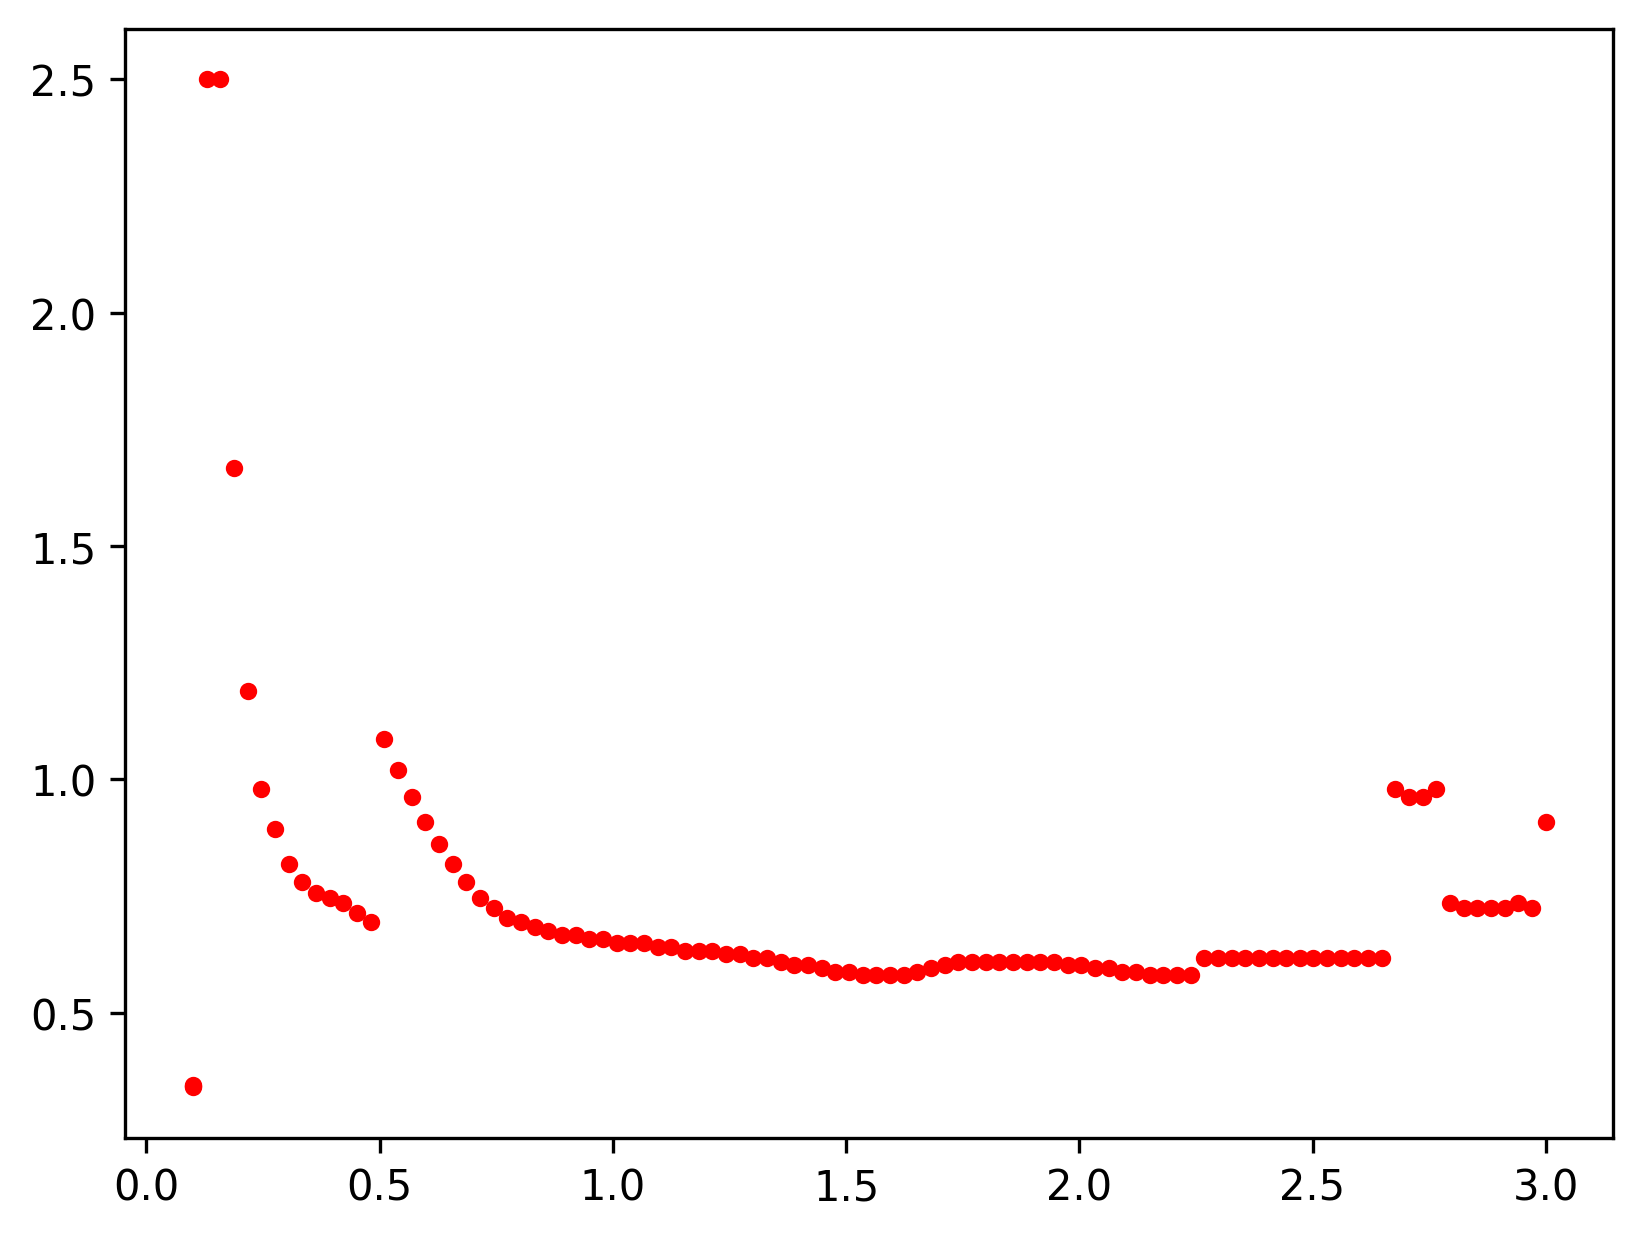

In [5]:
receiver_vels=[]
receiver_freqs=[]
receiver_peaks=[]
receiver_significances=[]
large=np.load(todo)
for i in range(len(large)):
        
    peaks,significance,_,slownesss=find_local_maxima(large[i,:,:],1,np.arange(0.4,3,0.02),np.arange(0.4,3,0.02))
    receiver_vels.extend(list(1/slownesss))
    receiver_peaks.extend(list(peaks))
    receiver_significances.extend(list(significance))
    receiver_freqs.extend(list(frange[i]*np.ones(len(slownesss)))) 
    
plt.figure(dpi=300)
plt.scatter(receiver_freqs,receiver_vels,c='r',s=10)

# single mode all pairs

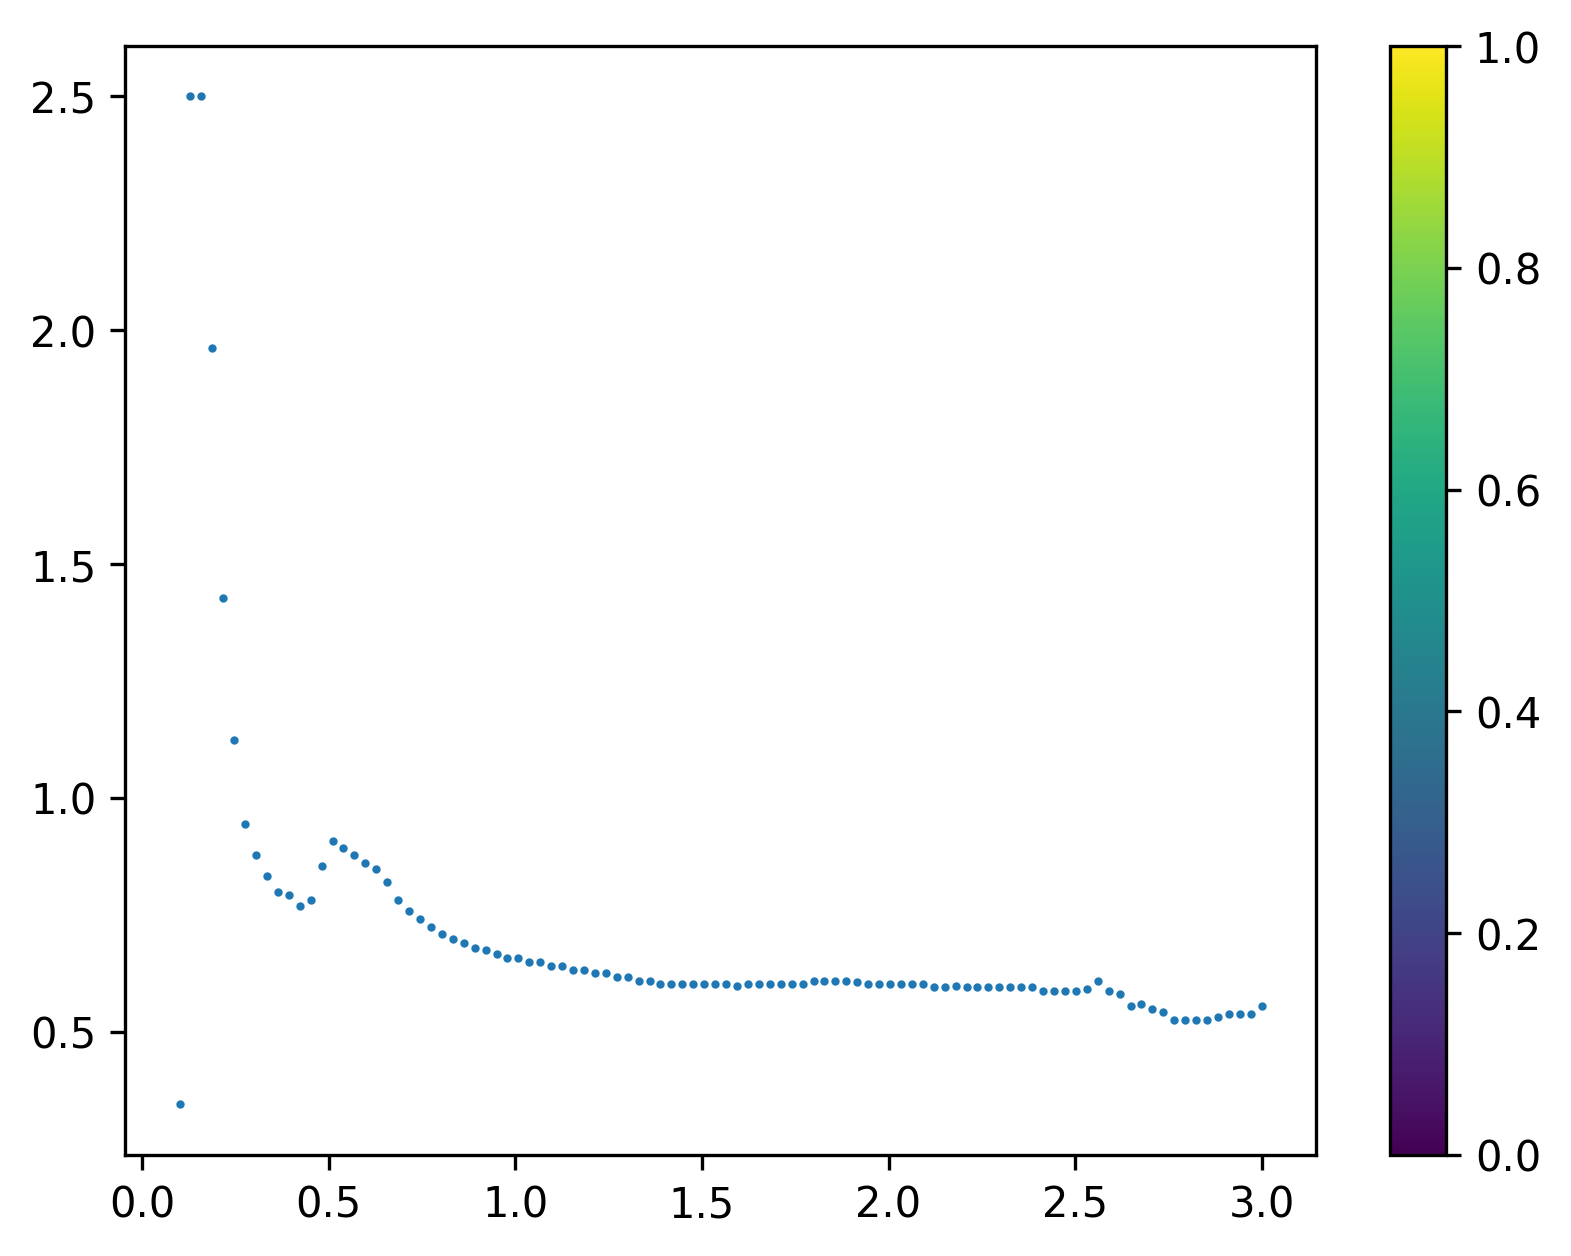

In [6]:
receiver_vels=[]
receiver_freqs=[]
receiver_peaks=[]
receiver_significances=[]

for beam in source_beams:
    
    large=np.load(beam)

    for i in range(len(large)):

        peaks,significance,slownesss,_=find_local_maxima(large[i,:,:],1,np.arange(0.4,3,0.02),np.arange(0.4,3,0.02))
        receiver_vels.extend(list(1/slownesss))
        receiver_peaks.extend(list(peaks))
        receiver_significances.extend(list(significance))
        receiver_freqs.extend(list(frange[i]*np.ones(len(slownesss))))   
        
for beam in receiver_beams:
    
    large=np.load(beam)

    for i in range(len(large)):

        peaks,significance,_,slownesss=find_local_maxima(large[i,:,:],1,np.arange(0.4,3,0.02),np.arange(0.4,3,0.02))
        receiver_vels.extend(list(1/slownesss))
        receiver_peaks.extend(list(peaks))
        receiver_significances.extend(list(significance))
        receiver_freqs.extend(list(frange[i]*np.ones(len(slownesss)))) 
        
freqs,vels=combine_lists(receiver_freqs,receiver_vels)
median_vels=[]
for i in range(len(vels)):
    median_vels.append(np.median(vels[i]))
plt.figure(dpi=300)
plt.scatter(freqs,median_vels,s=1)
plt.colorbar()

# multimode single pair

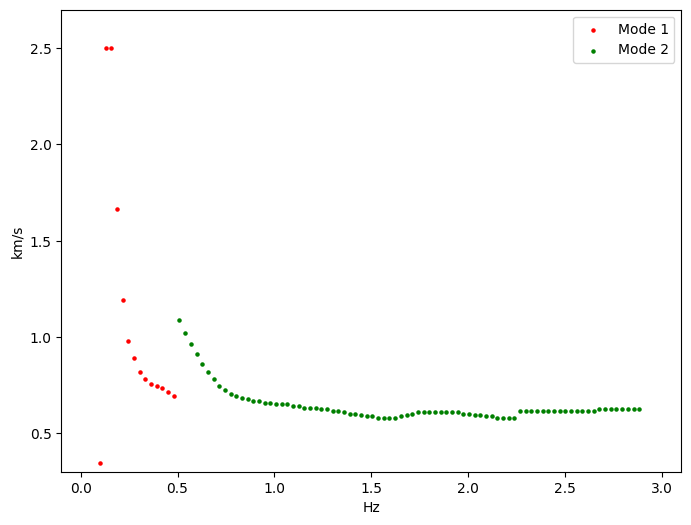

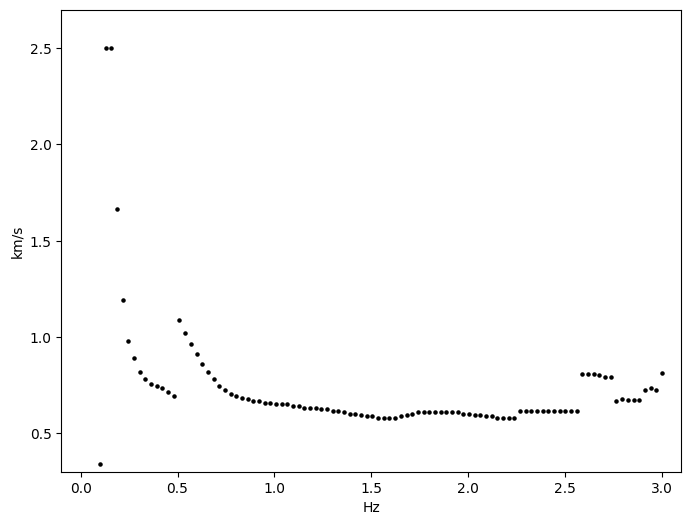

In [7]:
single_receiver_vels=[[]]
single_receiver_freqs=[[]]
single_receiver_peaks=[[]]
single_receiver_significances=[[]]
frange=np.linspace(0.1,3,100)
large=np.load(todo)
(single_receiver_vels,single_receiver_peaks,
 single_receiver_significances,single_receiver_freqs)=extract_single(large,frange,
                                                                     single_receiver_vels,single_receiver_peaks,
                                                                     single_receiver_significances,single_receiver_freqs,
                                                                     source=False)
try_freqs_single=[]
try_vels_single=[]
for i in range(len(single_receiver_freqs)):
    try_freqs_single+=single_receiver_freqs[i]
    try_vels_single+=single_receiver_vels[i]
      
modes_x_single, modes_y_single=filter_modes(try_freqs_single,try_vels_single,frange)
one_mode_x,one_mode_y,c=refine_dispersion(try_freqs_single,try_vels_single)
colors = ['red', 'green', 'blue', 'purple', 'orange', 'cyan', 'magenta']
    
plt.figure(figsize=(8, 6))    
for i in range(len(modes_x_single)):
    
    plt.scatter(modes_x_single[i], modes_y_single[i], color=colors[i % len(colors)], label=f'Mode {i+1}',s=5)

plt.xlim(-0.1,3.1)
plt.ylim(0.3,2.7)
plt.xlabel('Hz')
plt.ylabel('km/s')
plt.legend()
plt.show()    

plt.figure(figsize=(8, 6))    

plt.scatter(one_mode_x,one_mode_y, color='k',s=5)

plt.xlim(-0.1,3.1)
plt.ylim(0.3,2.7)
plt.xlabel('Hz')
plt.ylabel('km/s')
plt.show()    

# multimode all pairs

In [8]:
receiver_beams[60],receiver_beams[10]

('/scratch/zspica_root/zspica0/yaolinm/Florence/dbf/master/source_1000_receiver_1500_.npy',
 '/scratch/zspica_root/zspica0/yaolinm/Florence/dbf/master/source_0750_receiver_1500_.npy')

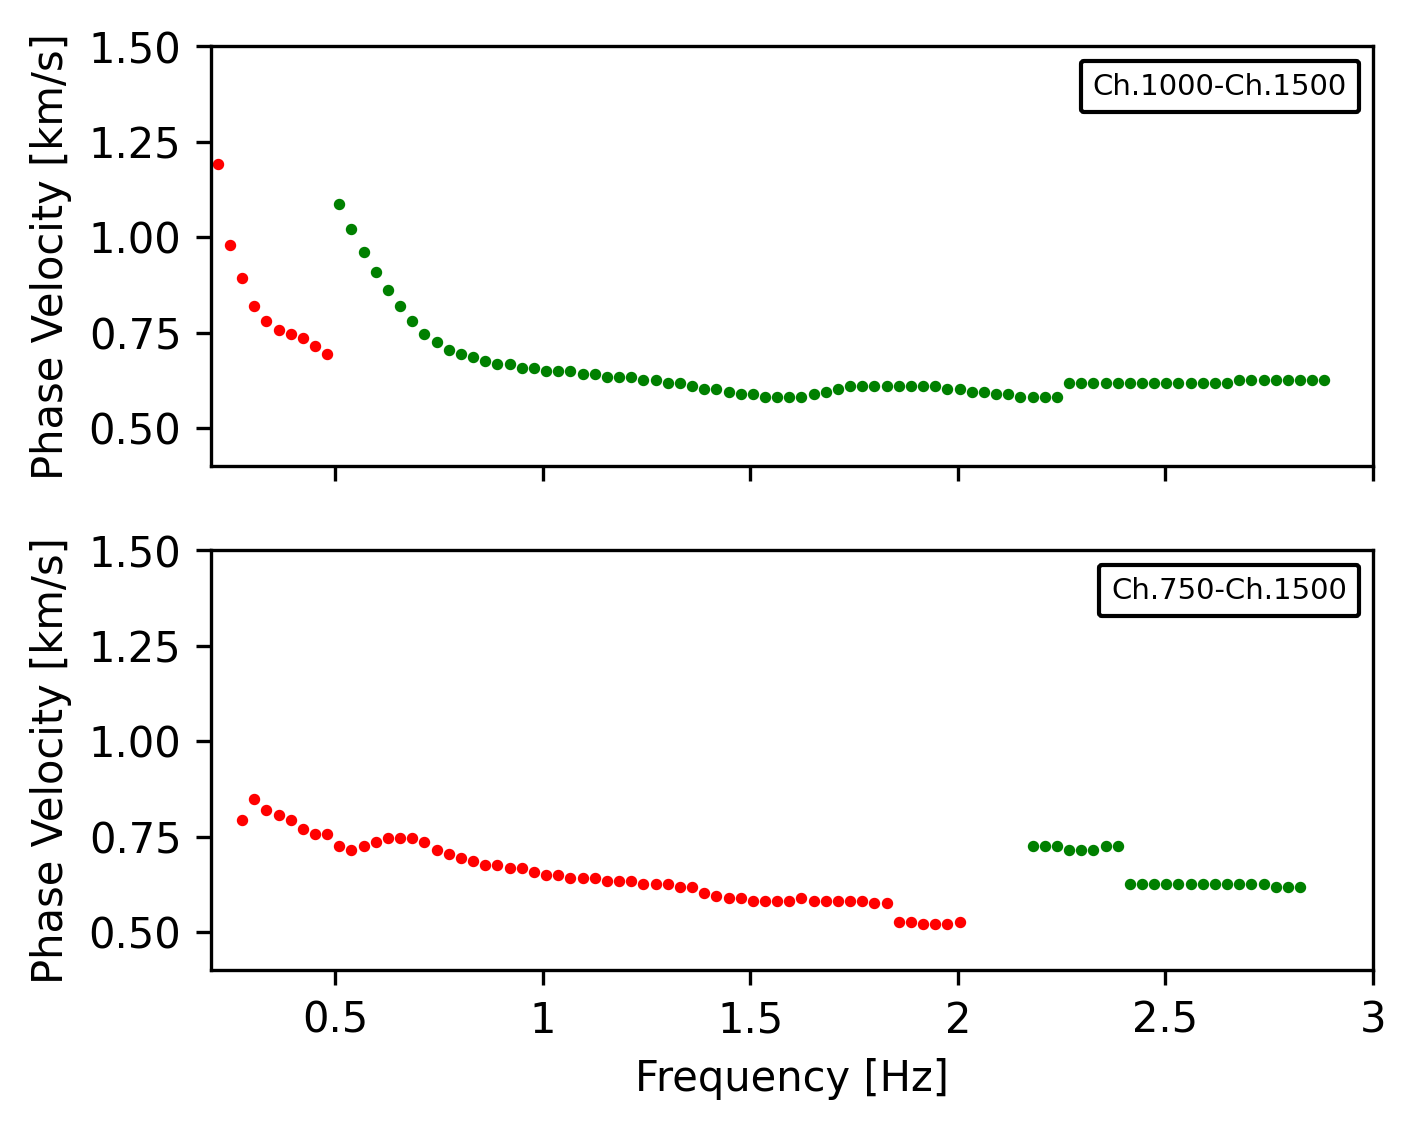

In [11]:
fig,[ax1,ax2]=plt.subplots(nrows=2,ncols=1,dpi=300,figsize=(5,4))

modes_x_single=results['60'][0]
modes_y_single=results['60'][1]
for i in range(len(modes_x_single)):
    ax1.scatter(modes_x_single[i], modes_y_single[i], color=colors[i % len(colors)],s=3)
ax1.set_xlim(0.2,3)
ax1.set_ylim(0.4,1.5)
ax1.set_xticks([0.5,1,1.5,2,2.5,3])
ax1.set_xticklabels(['','','','','',''])
ax1.set_ylabel('Phase Velocity [km/s]')
at = AnchoredText('Ch.1000-Ch.1500',prop=dict(size=7), frameon=True,loc=1,)
at.patch.set_boxstyle('round',pad=0,rounding_size=0.1)
ax1.add_artist(at)

modes_x_single=results['10'][0]
modes_y_single=results['10'][1]
for i in range(len(modes_x_single)):
    ax2.scatter(modes_x_single[i], modes_y_single[i], color=colors[i % len(colors)], label=f'Mode {i+1}',s=3)
ax2.set_xlim(0.2,3)
ax2.set_ylim(0.4,1.5)
ax2.set_xticks([0.5,1,1.5,2,2.5,3])
ax2.set_xticklabels([0.5,1,1.5,2,2.5,3])
ax2.set_xlabel('Frequency [Hz]')
ax2.set_ylabel('Phase Velocity [km/s]')
at = AnchoredText('Ch.750-Ch.1500',prop=dict(size=7), frameon=True,loc=1,)
at.patch.set_boxstyle('round',pad=0,rounding_size=0.1)
ax2.add_artist(at)

In [10]:
results={}

for i in range(len(receiver_beams)):
    
    large=np.load(receiver_beams[i])
    single_receiver_vels=[[]]
    single_receiver_freqs=[[]]
    single_receiver_peaks=[[]]
    single_receiver_significances=[[]]

    (single_receiver_vels,single_receiver_peaks,
     single_receiver_significances,single_receiver_freqs)=extract_single(large,frange,
                                                                         single_receiver_vels,single_receiver_peaks,
                                                                         single_receiver_significances,single_receiver_freqs,
                                                                         source=False)
    try_freqs=[]
    try_vels=[]
    
    for j in range(len(single_receiver_freqs)):
        try_freqs+=single_receiver_freqs[j]
        try_vels+=single_receiver_vels[j]
        
    modes_x,modes_y=filter_modes(try_freqs,try_vels,frange)
    results[str(i)]=[modes_x,modes_y]
    
for i in range(len(source_beams)):
    
    large=np.load(source_beams[i])
    single_receiver_vels=[[]]
    single_receiver_freqs=[[]]
    single_receiver_peaks=[[]]
    single_receiver_significances=[[]]

    (single_receiver_vels,single_receiver_peaks,
     single_receiver_significances,single_receiver_freqs)=extract_single(large,frange,
                                                                         single_receiver_vels,single_receiver_peaks,
                                                                         single_receiver_significances,single_receiver_freqs,
                                                                         source=True)
    try_freqs=[]
    try_vels=[]
    for j in range(len(single_receiver_freqs)):
        try_freqs+=single_receiver_freqs[j]
        try_vels+=single_receiver_vels[j]
        
    modes_x,modes_y=filter_modes(try_freqs,try_vels,frange)
    results[str(i+len(receiver_beams))]=[modes_x,modes_y]

In [12]:
max_mode=1
for i in range(len(results.keys())):
    max_mode=max(max_mode,len(results[str(i)][0]))

all_mode_freq,all_mode_vel=[],[]

for mode in range(max_mode):
    
    temp_mode_freq,temp_mode_vel=[],[]
    
    for i in range(len(results.keys())):
        
        if len(results[str(i)][0])>mode:
            
            temp_mode_freq.extend(results[str(i)][0][mode])
            temp_mode_vel.extend(results[str(i)][1][mode])
            
    all_mode_freq.append(temp_mode_freq)
    all_mode_vel.append(temp_mode_vel)

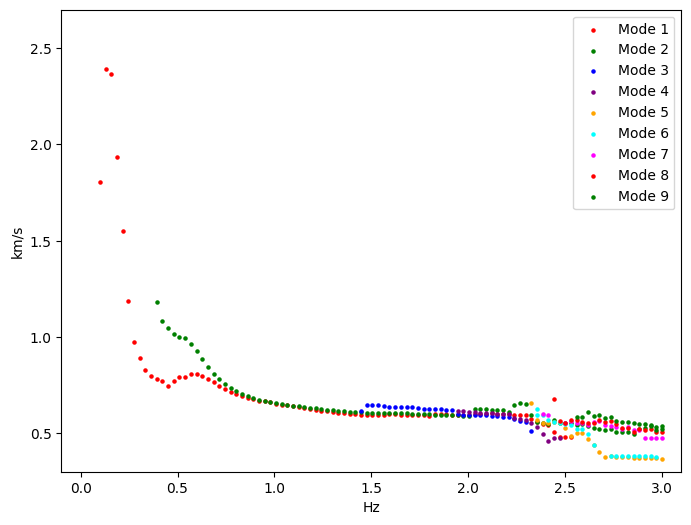

In [13]:
try_freqs=[]
try_vels=[]

for mode in range(len(all_mode_freq)):
    
    if len(all_mode_freq[mode])>=15:
        
        a,b,c=refine_dispersion(all_mode_freq[mode],all_mode_vel[mode])
        
        for j in range(len(a)):
            
            if a[j] in try_freqs:
                
                indices=np.where(np.array(try_freqs)==a[j])[0]
                add=True
                
                for index in indices:
                    this_vel=try_vels[index]
                    ""
                    if this_vel==b[j]:
                        add=False
                
                if add:
                    try_freqs.append(a[j])
                    try_vels.append(b[j])
                    
            else:
                try_freqs.append(a[j])
                try_vels.append(b[j])
        
modes_x, modes_y=filter_modes(try_freqs,try_vels,frange)

colors = ['red', 'green', 'blue', 'purple', 'orange', 'cyan', 'magenta']

plt.figure(figsize=(8, 6))    
for i in range(len(modes_x)):
    
    plt.scatter(modes_x[i], modes_y[i], color=colors[i % len(colors)], label=f'Mode {i+1}',s=5)

plt.xlim(-0.1,3.1)
plt.ylim(0.3,2.7)
plt.xlabel('Hz')
plt.ylabel('km/s')
plt.legend()
plt.show()    

In [6]:
# multimode_U=np.load('/home/yaolinm/Projects/Florence/complete_workflow/multimode_U.npy')
# multimode_U2=np.load('/home/yaolinm/Projects/Florence/complete_workflow/multimode_U2.npy')
# multimode_U3=np.load('/home/yaolinm/Projects/Florence/complete_workflow/multimode_U3.npy')
# multimode_vs=np.load('/home/yaolinm/Projects/Florence/complete_workflow/multimode_vs.npy')
# multimode_vs2=np.load('/home/yaolinm/Projects/Florence/complete_workflow/multimode_vs2.npy')
# multimode_vs3=np.load('/home/yaolinm/Projects/Florence/complete_workflow/multimode_vs3.npy')

# singlemode_U=np.load('/home/yaolinm/Projects/Florence/complete_workflow/singlemode_U.npy')
# singlemode_U2=np.load('/home/yaolinm/Projects/Florence/complete_workflow/singlemode_U2.npy')
# singlemode_U3=np.load('/home/yaolinm/Projects/Florence/complete_workflow/singlemode_U3.npy')
# singlemode_vs=np.load('/home/yaolinm/Projects/Florence/complete_workflow/singlemode_vs.npy')
# singlemode_vs2=np.load('/home/yaolinm/Projects/Florence/complete_workflow/singlemode_vs2.npy')
# singlemode_vs3=np.load('/home/yaolinm/Projects/Florence/complete_workflow/singlemode_vs3.npy')

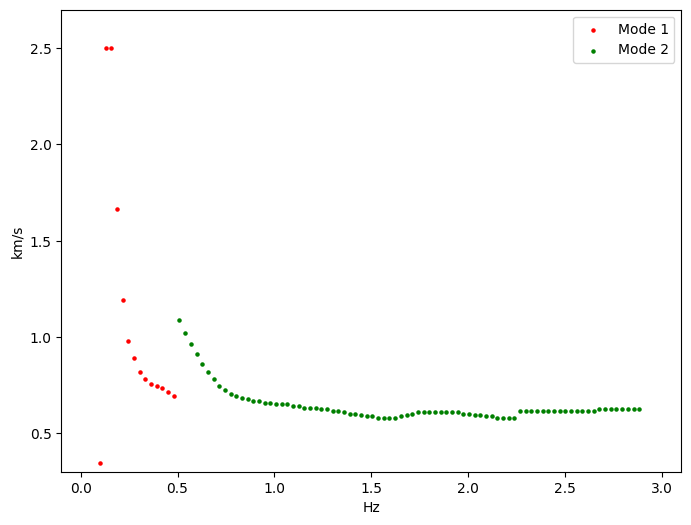

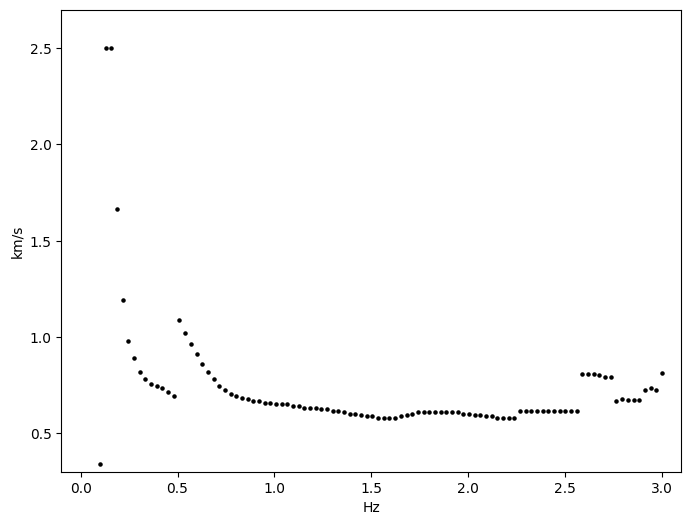

In [17]:
large=np.load('/scratch/zspica_root/zspica0/yaolinm/Florence/dbf/master/source_1000_receiver_1500_.npy')

### single mode dispersion

receiver_vels=[]
receiver_freqs=[]
receiver_peaks=[]
receiver_significances=[]

for beam in source_beams:
    
    large=np.load(beam)

    for i in range(len(large)):

        peaks,significance,slownesss,_=find_local_maxima(large[i,:,:],1,np.arange(0.4,3,0.02),np.arange(0.4,3,0.02))
        receiver_vels.extend(list(1/slownesss))
        receiver_peaks.extend(list(peaks))
        receiver_significances.extend(list(significance))
        receiver_freqs.extend(list(frange[i]*np.ones(len(slownesss))))   
        
for beam in receiver_beams:
    
    large=np.load(beam)

    for i in range(len(large)):

        peaks,significance,_,slownesss=find_local_maxima(large[i,:,:],1,np.arange(0.4,3,0.02),np.arange(0.4,3,0.02))
        receiver_vels.extend(list(1/slownesss))
        receiver_peaks.extend(list(peaks))
        receiver_significances.extend(list(significance))
        receiver_freqs.extend(list(frange[i]*np.ones(len(slownesss)))) 
        
freqs,vels=combine_lists(receiver_freqs,receiver_vels)
median_vels=[]
for i in range(len(vels)):
    median_vels.append(np.median(vels[i]))
plt.figure(dpi=300)
plt.scatter(freqs,median_vels,s=1)
plt.colorbar()
plt.show()  

### multimode dispersion

single_receiver_vels=[[]]
single_receiver_freqs=[[]]
single_receiver_peaks=[[]]
single_receiver_significances=[[]]
frange=np.linspace(0.1,3,100)
large=np.load(todo)
(single_receiver_vels,single_receiver_peaks,
 single_receiver_significances,single_receiver_freqs)=extract_single(large,frange,
                                                                     single_receiver_vels,single_receiver_peaks,
                                                                     single_receiver_significances,single_receiver_freqs,
                                                                     source=False)
try_freqs_single=[]
try_vels_single=[]
for i in range(len(single_receiver_freqs)):
    try_freqs_single+=single_receiver_freqs[i]
    try_vels_single+=single_receiver_vels[i]
      
modes_x_single, modes_y_single=filter_modes(try_freqs_single,try_vels_single,frange)
one_mode_x,one_mode_y,c=refine_dispersion(try_freqs_single,try_vels_single)
colors = ['red', 'green', 'blue', 'purple', 'orange', 'cyan', 'magenta']
    
plt.figure(figsize=(8, 6))    
for i in range(len(modes_x_single)):
    
    plt.scatter(modes_x_single[i], modes_y_single[i], color=colors[i % len(colors)], label=f'Mode {i+1}',s=5)

plt.xlim(-0.1,3.1)
plt.ylim(0.3,2.7)
plt.xlabel('Hz')
plt.ylabel('km/s')
plt.legend()
plt.show()    

plt.figure(figsize=(8, 6))    

plt.scatter(one_mode_x,one_mode_y, color='k',s=5)

plt.xlim(-0.1,3.1)
plt.ylim(0.3,2.7)
plt.xlabel('Hz')
plt.ylabel('km/s')
plt.show()    

In [51]:
from inversion import *

### single mode inversion

pratioflag=1
lsmth=500
nupds=6
Nn=200
msigmaf=2
chilo=1
chihi=1.21

h=np.ones(Nn)*50
vsv=np.ones(Nn)*1000*np.linspace(1,3.5,200)
# vsv[:16]*=np.linspace(1,2,16)
# vsv[16:]=1000
vpvsratio=1.7321
vpv=vsv*vpvsratio
rhov=np.ones(Nn)*2090.44865

Nnf=0
vpfv=np.array([])
rhofv=np.array([])
hfv=np.array([])


Nf=len(frange[4:])
fks=frange[4:]
U_data = np.array(median_vels[4:])*1000
U_data_errs = np.ones(Nf)*0.15
modn = np.ones(Nf)
vflg = np.zeros(Nf)



single_vsv_update,single_Ur_list,single_fksr_list,single_chi_list=invert(U_data, Nn, vsv, vpv, rhov, fks, h, modn,vpvsratio,
                                                                     nupds,lsmth,msigmaf,chilo,chihi,U_data_errs, 
                                                                     vflg, Nnf, vpfv, rhofv, hfv,pratioflag)

index=np.argmin(np.array(single_chi_list))
single_U=single_Ur_list[index]
single_fksr=single_fksr_list[index]
single_model=single_vsv_update[index]

### multimode inversion

pratioflag=1
lsmth=500
nupds=6
Nn=200
msigmaf=2
chilo=1
chihi=1.21

h=np.ones(Nn)*50
vsv=np.ones(Nn)*1000*np.linspace(1,3.5,200)
vpvsratio=1.7321
vpv=vsv*vpvsratio
rhov=np.ones(Nn)*2090.44865

Nnf=0
vpfv=np.array([])
rhofv=np.array([])
hfv=np.array([])

dispersion=modes_x_single
freqs=[]
vels=[]
modes=[]

for i in range(min(len(modes_x_single),3)):
    for j in range(len(modes_x_single[i])):
        if modes_x_single[i][j]>=0.2:
            freqs.append(modes_x_single[i][j])
            vels.append(modes_y_single[i][j])
            modes.append(i+1)


Nf=len(freqs)
fks = np.array(freqs)
U_data = np.array(vels)*1000
U_data_errs = np.ones(Nf)*0.15
modn = np.array(modes)
vflg = np.zeros(Nf)

multi_vsv_update,multi_Ur_list,multi_fksr_list,multi_chi_list=invert(U_data, Nn, vsv, vpv, rhov, fks, h, modn,vpvsratio,
                                                                     nupds,lsmth,msigmaf,chilo,chihi,U_data_errs, 
                                                                     vflg, Nnf, vpfv, rhofv, hfv,pratioflag)

index=np.argmin(np.array(multi_chi_list))
multi_U=multi_Ur_list[index]
multi_fksr=multi_fksr_list[index]
multi_model=multi_vsv_update[index]


(200, 96) (200, 96) 0
(200, 96) (200, 96) 0
(200, 96) (200, 96) 0
0 3.6199353378405656
(200, 96) (200, 96) 0
(200, 96) (200, 96) 0
1 2.0672548241960578
(200, 96) (200, 96) 0
(200, 96) (200, 96) 0
2 2.0149340920876604
(200, 96) (200, 96) 0
(200, 96) (200, 96) 0
3 2.015955997458357
(200, 96) (200, 96) 0
(200, 96) (200, 96) 0
4 2.0171083757891135
(200, 96) (200, 96) 0
(200, 96) (200, 96) 0
5 2.016721960755121
(200, 96) (200, 96) 0
(200, 96) (200, 96) 0
(200, 92) (200, 92) 0
(200, 92) (200, 92) 0
(200, 92) (200, 92) 0
0 11.398934171699135
(200, 92) (200, 92) 0
(200, 92) (200, 92) 0
1 6.859145776468726
(200, 92) (200, 92) 0
(200, 92) (200, 92) 0
2 6.551206446682575
(200, 92) (200, 92) 0
(200, 92) (200, 92) 0
(200, 92) (200, 92) 0
3 6.162480084644564
(200, 92) (200, 92) 0
(200, 92) (200, 92) 0
4 5.093619049648524
(200, 92) (200, 92) 0
(200, 92) (200, 92) 0
(200, 92) (200, 92) 0
5 5.034643235160451
(200, 92) (200, 92) 0
(200, 92) (200, 92) 0


In [72]:
forplot=large[14,30:,25:]
np.unravel_index(np.argmax(forplot),forplot.shape)

(25, 30)

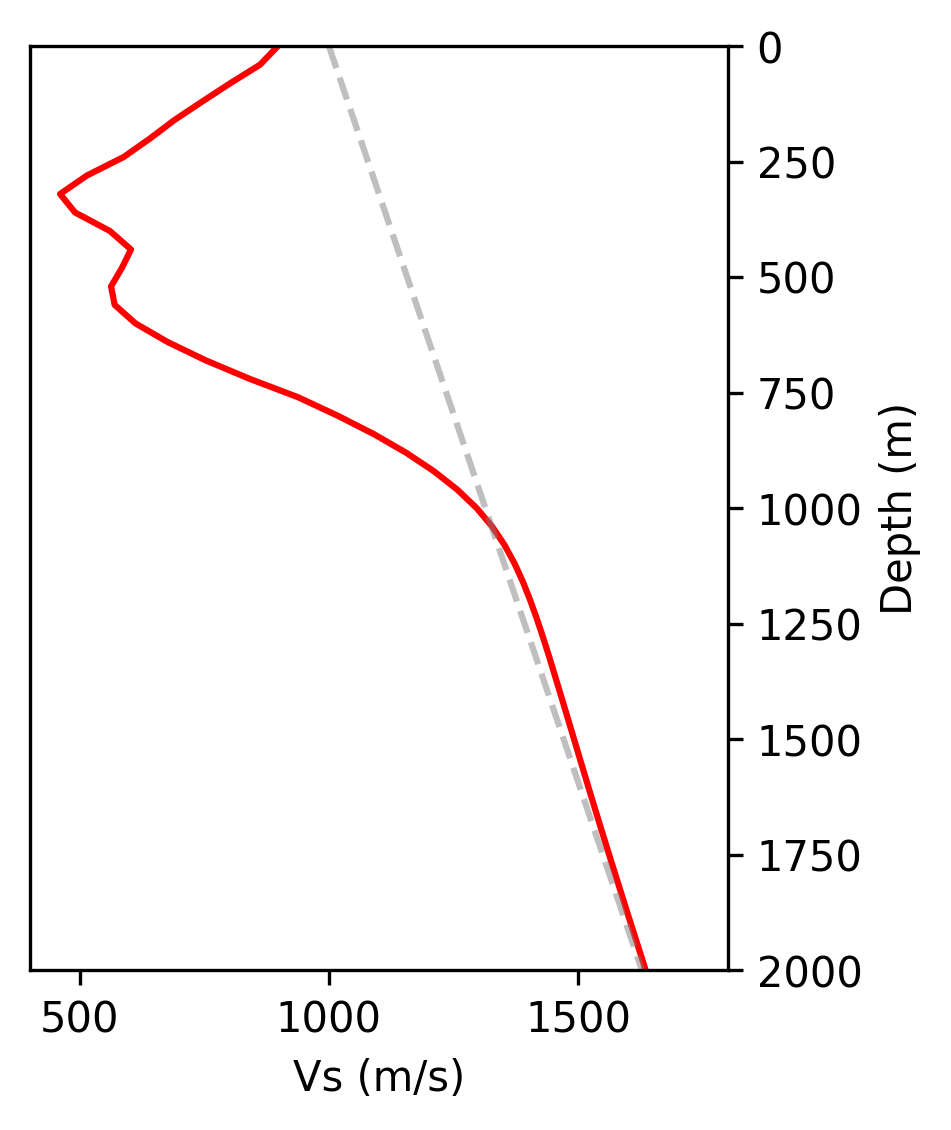

In [79]:
fig,ax6=plt.subplots(1,1,figsize=(3,4),dpi=300)

ax6.plot(multi_model,np.cumsum(np.ones(200)*40)-40,c='r',label='Multimodal inversion')
ax6.plot(np.ones(200)*1000*np.linspace(1,3.5,200),np.cumsum(np.ones(200)*40)-40,c='grey',linestyle='--',alpha=0.5,label='Initial model')
ax6.set_xlim(400,1800)
ax6.set_ylim(2000,0)
ax6.set_xlabel('Vs (m/s)')
ax6.set_ylabel('Depth (m)')
ax6.set_xticks([500,1000,1500])
ax6.set_xticklabels([500,1000,1500])

ax6.yaxis.tick_right()
ax6.yaxis.set_label_position('right')


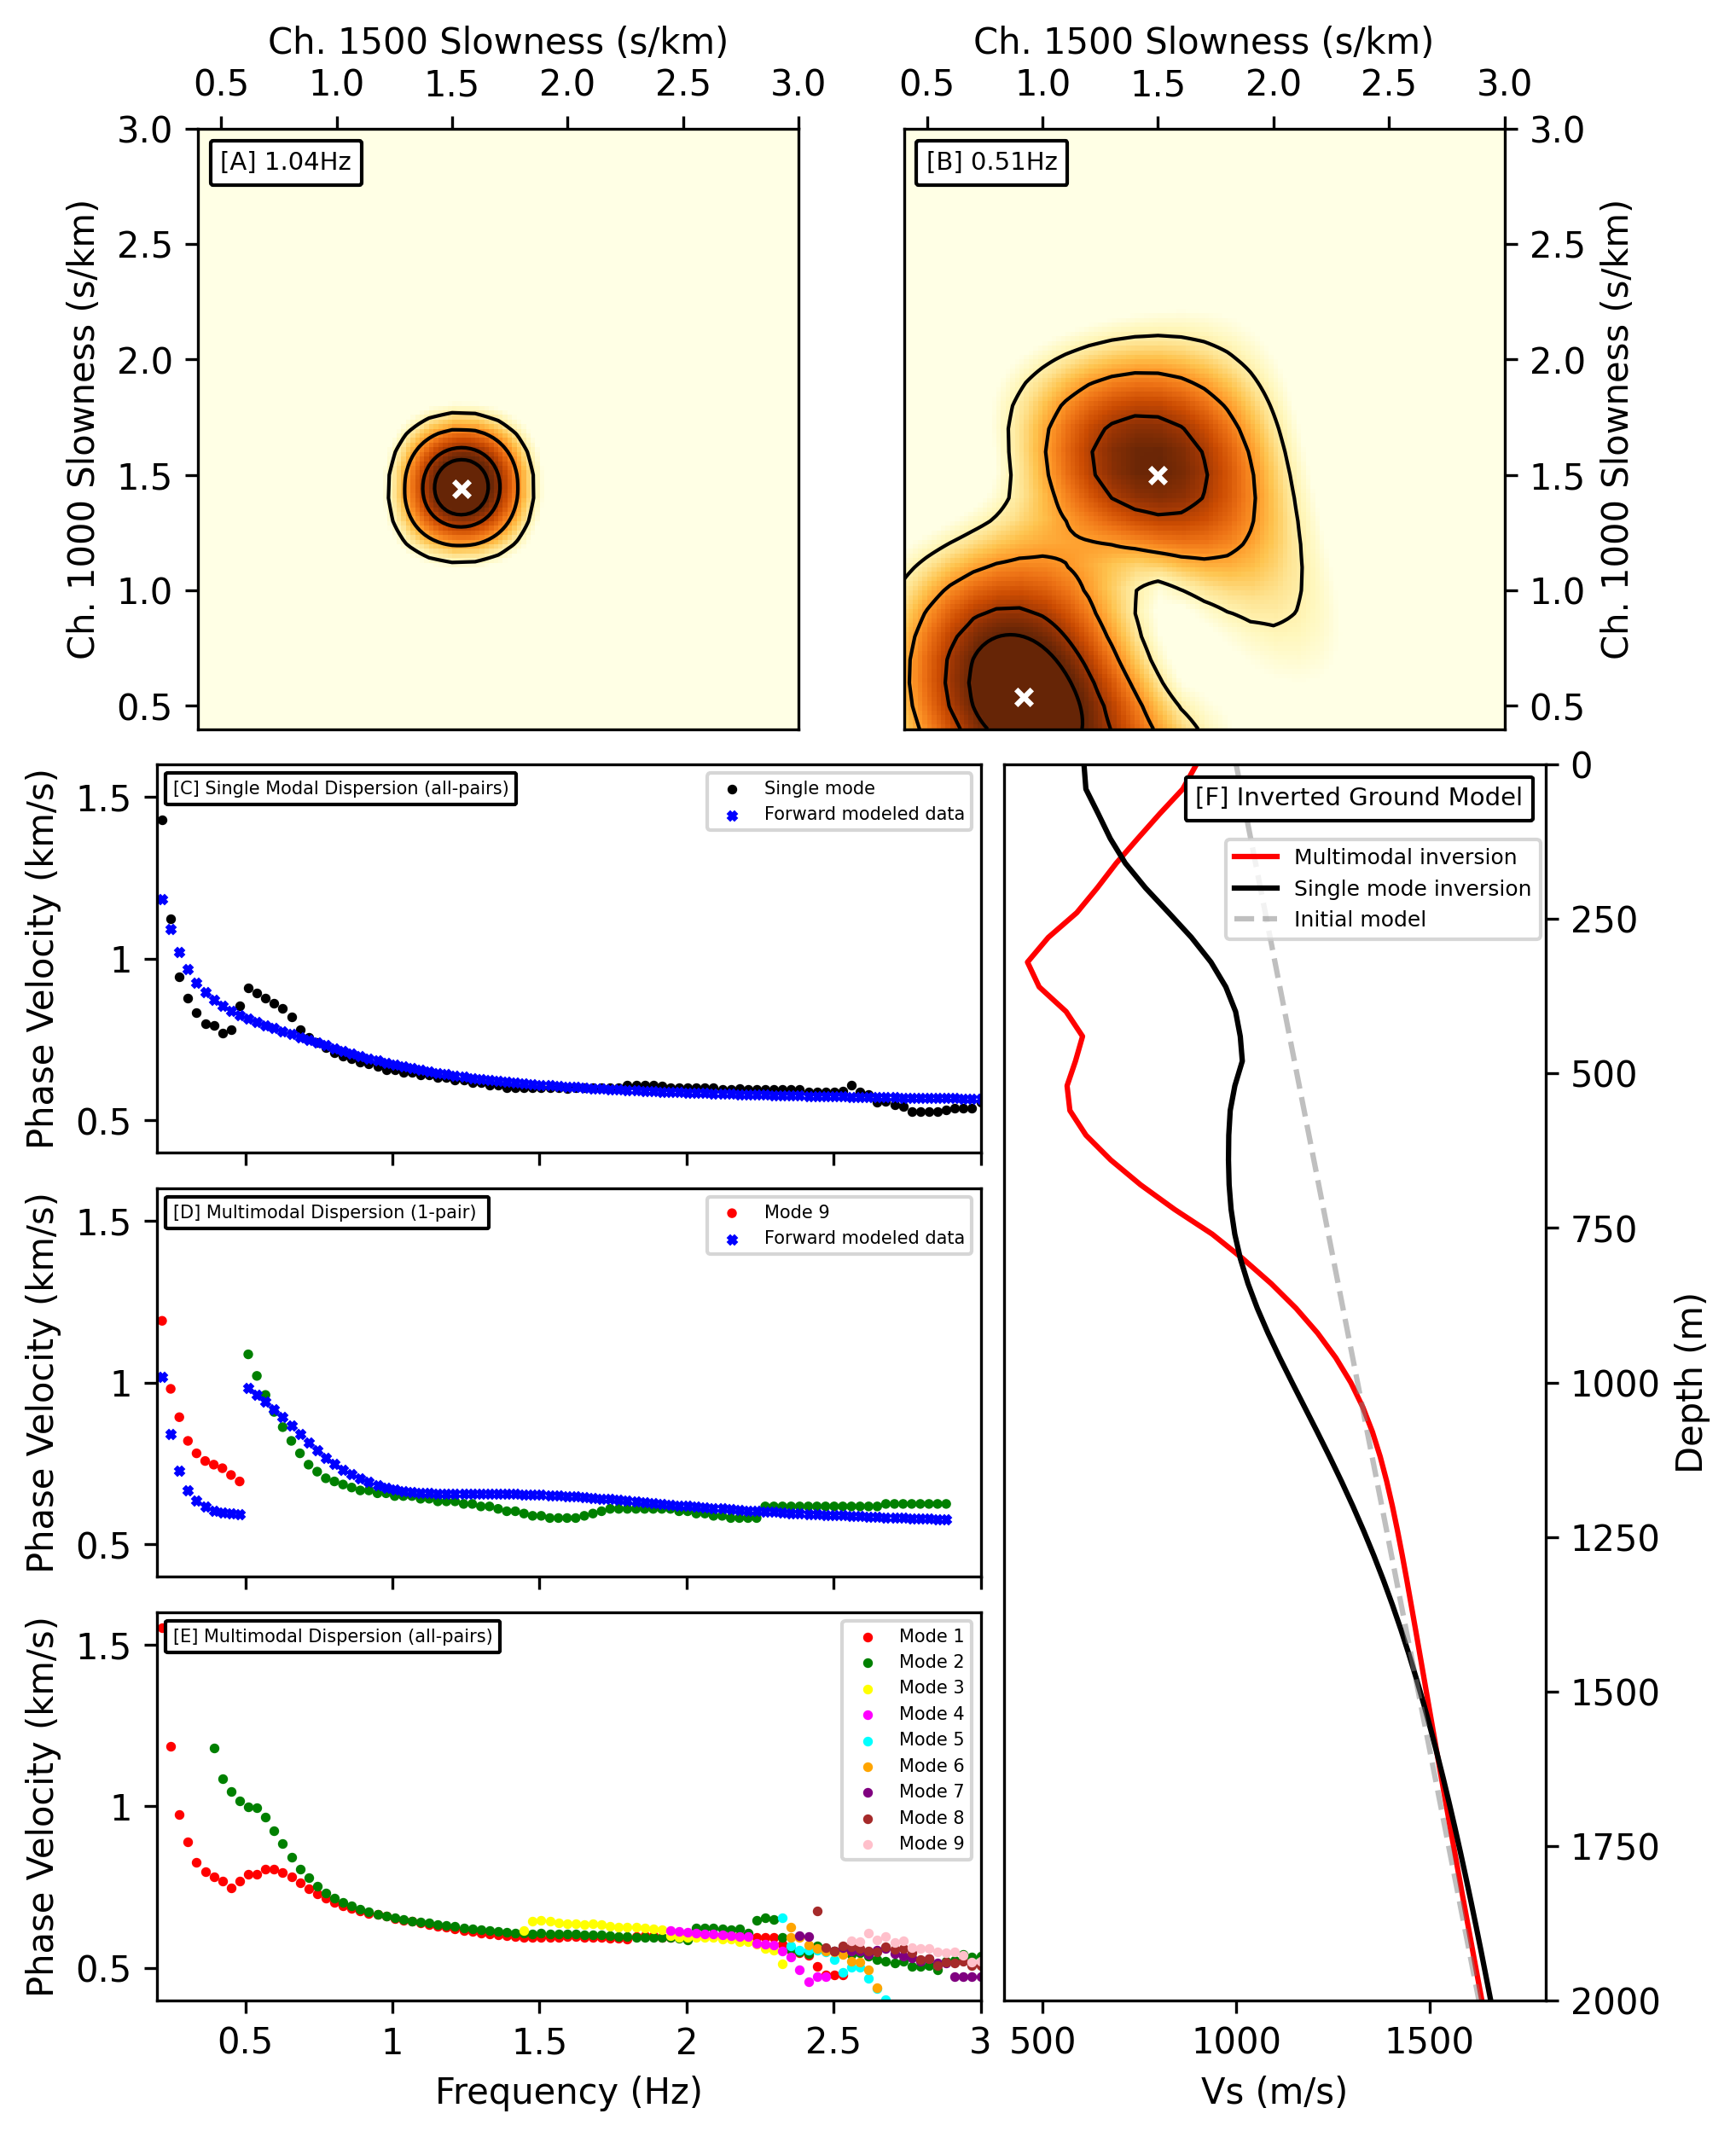

In [59]:
cmap='YlOrBr'

fig=plt.figure(figsize=(7,9.5),dpi=300)
fig.subplots_adjust(hspace=0.2,wspace=0.2)

ax1=plt.subplot2grid(shape=(9,10),loc=(0,0),colspan=5,rowspan=3)
ax2=plt.subplot2grid(shape=(9,10),loc=(0,5),colspan=5,rowspan=3)
ax3=plt.subplot2grid(shape=(9,10),loc=(3,0),colspan=6,rowspan=2)
ax4=plt.subplot2grid(shape=(9,10),loc=(5,0),colspan=6,rowspan=2)
ax5=plt.subplot2grid(shape=(9,10),loc=(7,0),colspan=6,rowspan=2)
ax6=plt.subplot2grid(shape=(9,10),loc=(3,6),colspan=4,rowspan=6)

ax1.set_aspect('equal')
ax2.set_aspect('equal')

forplot=large[32,:,:]
ax1.pcolormesh(forplot/np.max(np.abs(forplot)),vmin=0.3,vmax=0.9,cmap=cmap)
ax1.scatter(57,52,marker='x',c='w',s=20)
ax1.contour(forplot/np.max(np.abs(forplot)),levels=[0.4,0.6,0.8,0.9],colors='k',linewidths=1)
ax1.xaxis.tick_top()
ax1.set_xticks(np.arange(5,131,25))
ax1.set_xticklabels(np.round(np.arange(0.5,3.01,0.5),3))
ax1.set_yticks(np.arange(5,131,25))
ax1.set_yticklabels(np.round(np.arange(0.5,3.01,0.5),3))
ax1.set_ylabel('Ch. 1000 Slowness (s/km)')
ax1.set_xlabel('Ch. 1500 Slowness (s/km)')    
ax1.xaxis.set_label_position('top') 
at = AnchoredText('[A] 1.04Hz',prop=dict(size=7), frameon=True,loc=2,)
at.patch.set_boxstyle('round',pad=0,rounding_size=0.1)
ax1.add_artist(at)

forplot=large[14,:,:]
ax2.pcolormesh(forplot/np.max(np.abs(forplot)),vmin=0.3,vmax=0.9,cmap=cmap)
ax2.scatter(26,7,marker='x',c='w',s=20)
ax2.scatter(55,55,marker='x',c='w',s=20)
ax2.contour(forplot/np.max(np.abs(forplot)),levels=[0.4,0.6,0.8,0.9],colors='k',linewidths=1)
ax2.xaxis.tick_top()
ax2.yaxis.tick_right()
ax2.set_xticks(np.arange(5,131,25))
ax2.set_xticklabels(np.round(np.arange(0.5,3.01,0.5),3))
ax2.set_yticks(np.arange(5,131,25))
ax2.set_yticklabels(np.round(np.arange(0.5,3.01,0.5),3))
ax2.set_ylabel('Ch. 1000 Slowness (s/km)')
ax2.set_xlabel('Ch. 1500 Slowness (s/km)')    
ax2.xaxis.set_label_position('top') 
ax2.yaxis.set_label_position('right')
at = AnchoredText('[B] 0.51Hz',prop=dict(size=7), frameon=True,loc=2,)
at.patch.set_boxstyle('round',pad=0,rounding_size=0.1)
ax2.add_artist(at)

ax3.scatter(frange,median_vels,c='k',s=3,label='Single mode') 
ax3.scatter(single_fksr,single_U/1000,c='b',s=5,marker='x',label='Forward modeled data')
ax3.legend(fontsize=5)
ax3.set_ylim(0.4,1.6)
ax3.set_xlim(0.2,3.0)
ax3.set_yticks([0.5,1,1.5])
ax3.set_yticklabels([0.5,1,1.5])
ax3.set_ylabel('Phase Velocity (km/s)')
ax3.set_xticks([0.5,1,1.5,2,2.5,3])
ax3.set_xticklabels(['','','','','',''])
at = AnchoredText('[C] Single Modal Dispersion (all-pairs)',prop=dict(size=5), frameon=True,loc=2,)
at.patch.set_boxstyle('round',pad=0,rounding_size=0.1)
ax3.add_artist(at)

# for i in range(len(modes_x_single)):
#     ax4.scatter(modes_x_single[i], modes_y_single[i], color=colors[i % len(colors)], label=f'Mode {i+1}',s=3)

ax4.scatter(freqs,vels,color=np.array(colors)[modn-1], label=f'Mode {i+1}',s=3)
ax4.scatter(multi_fksr,multi_U/1000,c='b',s=5,marker='x',label='Forward modeled data')
ax4.legend(fontsize=5)  
ax4.set_ylim(0.4,1.6)
ax4.set_xlim(0.2,3.0)
ax4.set_yticks([0.5,1,1.5])
ax4.set_yticklabels([0.5,1,1.5])
ax4.set_xticks([0.5,1,1.5,2,2.5,3])
ax4.set_xticklabels(['','','','','',''])
ax4.set_ylabel('Phase Velocity (km/s)')
at = AnchoredText('[D] Multimodal Dispersion (1-pair) ',prop=dict(size=5), frameon=True,loc=2,)
at.patch.set_boxstyle('round',pad=0,rounding_size=0.1)
ax4.add_artist(at)

colors=['#FF0000', '#008000', '#FFFF00', '#FF00FF', '#00FFFF', '#FFA500', '#800080', '#A52A2A', '#FFC0CB']
for i in range(len(modes_x)):
    ax5.scatter(modes_x[i], modes_y[i], color=colors[i % len(colors)], label=f'Mode {i+1}',s=3)
ax5.legend(fontsize=5) 
ax5.set_xlabel('Frequency (Hz)')
ax5.set_ylim(0.4,1.6)
ax5.set_xlim(0.2,3.0)
ax5.set_yticks([0.5,1,1.5])
ax5.set_yticklabels([0.5,1,1.5])
ax5.set_xticks([0.5,1,1.5,2,2.5,3])
ax5.set_xticklabels([0.5,1,1.5,2,2.5,3])
ax5.set_ylabel('Phase Velocity (km/s)')
at = AnchoredText('[E] Multimodal Dispersion (all-pairs)',prop=dict(size=5), frameon=True,loc=2,)
at.patch.set_boxstyle('round',pad=0,rounding_size=0.1)
ax5.add_artist(at)

ax6.plot(multi_model,np.cumsum(np.ones(200)*40)-40,c='r',label='Multimodal inversion')
ax6.plot(single_model,np.cumsum(np.ones(200)*40)-40,c='k',label='Single mode inversion')
ax6.plot(np.ones(200)*1000*np.linspace(1,3.5,200),np.cumsum(np.ones(200)*40)-40,c='grey',linestyle='--',alpha=0.5,label='Initial model')
ax6.set_xlim(400,1800)
ax6.set_ylim(2000,0)
ax6.set_xlabel('Vs (m/s)')
ax6.set_ylabel('Depth (m)')
ax6.set_xticks([500,1000,1500])
ax6.set_xticklabels([500,1000,1500])
ax6.legend(fontsize=6,bbox_to_anchor=(0.39,0.85),loc=3)
ax6.yaxis.tick_right()
ax6.yaxis.set_label_position('right')
at = AnchoredText('[F] Inverted Ground Model',prop=dict(size=7), frameon=True,loc=1,)
at.patch.set_boxstyle('round',pad=0,rounding_size=0.1)
ax6.add_artist(at)


In [41]:
# with open('multimode.txt', 'w') as file:
    
#     for mode in range(len(modes_x_single)):
#         for i in range(len(modes_x_single[mode])):
#             if modes_x_single[mode][i]>0.2 and 0.5<=modes_y_single[mode][i]<=2:
#                 file.write(f"{modes_x_single[mode][i]}\t{modes_y_single[mode][i]}\t{str(mode+1)}\n")

In [40]:
# with open('singlemode.txt', 'w') as file:
    
#     for i in range(len(median_vels)):
#         if freqs[i]>0.2 and 0.5<=median_vels[i]<=2:
#             file.write(f"{freqs[i]}\t{median_vels[i]}\t{str(1)}\n")